# 分類

## MINIST

In [24]:
from sklearn.datasets import fetch_mldata

In [25]:
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [26]:
X, y = mnist['data'], mnist['target']

In [27]:
X.shape

(70000, 784)

In [28]:
y.shape

(70000,)

In [29]:
import matplotlib
import matplotlib.pyplot as plt

In [30]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

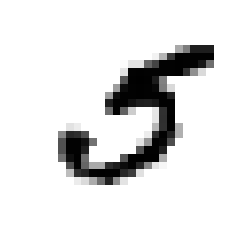

In [31]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
                 interpolation='nearest')
plt.axis('off')
plt.show()

ラベルを確認

In [32]:
y[36000]

5.0

In [34]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [35]:
import numpy as np

In [36]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 二項分類器の訓練

In [37]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

`sckit-learn`の`SGDClassfier`(確率的勾配下降法)を使用する  
確率的勾配下降法は大規模なデータセットを効率扱える長所がある

In [38]:
from sklearn.linear_model import SGDClassifier

In [40]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
sgd_clf.predict([some_digit])

array([ True])

## 性能指標

### 交差検定

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

array([0.96615, 0.9617 , 0.9625 ])

96%の正解率が出た。次に全ての画像を`5以外`に分類する分類器の結果をみてみる。

In [44]:
from sklearn.base import BaseEstimator

In [45]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [46]:
never_5_clf = Never5Classifier()

In [47]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9078 , 0.9123 , 0.90885])

約90%の正解率を示している。  
しかし、一部のクラスが他のクラスよりも出現頻度が高いデータセットでは正解率は当てはまらない

### 混同行列

分類器の性能評価として混同行列の方がはるかに優れている。

In [48]:
from sklearn.model_selection import cross_val_predict

In [49]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

`confusion_matrix`を利用して混同行列を得る

In [51]:
from sklearn.metrics import confusion_matrix

\begin{pmatrix}
真陰性 &偽陽性 \\
偽陽性 & 真陰性
\end{pmatrix}

In [52]:
confusion_matrix(y_train_5, y_train_pred)

array([[53987,   592],
       [ 1601,  3820]])

得られた配列の1行目は`5以外`を判別するクラス、2行目は`5`を判別するクラス  

- 5以外: 53987件は`５以外`と正しく分類され、592件は誤って分類された。
- 5     : 3820件は`５`と正しく分類され、1601件は誤って分類された。